In [1]:
%load_ext autoreload
%autoreload 2

import post
import tunerExperiment
import argparse
import numpy as np
import pickle
from matplotlib import pyplot as plt
import scipy
import tensorflow as tf
import metrics


2022-12-07 18:02:51.796053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tunerV4_trials500_rot0_results.pkl
tunerV4_trials500_rot1_results.pkl
tunerV4_trials500_rot2_results.pkl
tunerV4_trials500_rot3_results.pkl
tunerV4_trials500_rot4_results.pkl
tunerV4_trials500_rot5_results.pkl


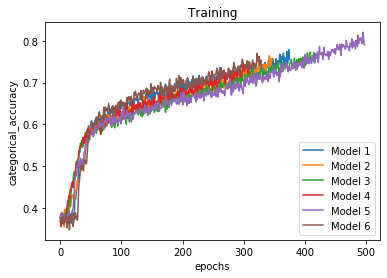

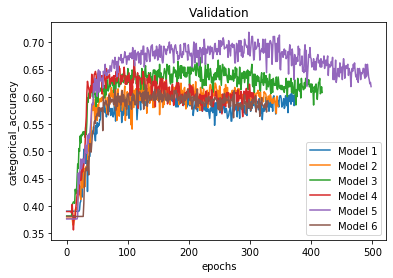

Average Val Accuracy:  0.6466391960779826


In [2]:
#post.visualizeExperiment('results', 'folds_rot3_r4_f15_11_11_11_20_18_18_18_25_22_22_22_30_28_28_35_50_80_k5_7_7_7_7_7_7_7_7_7_7_7_7_7_7_6_5_5_p1_1_1_1_3_1_1_1_3_1_1_1_3_1_1_1_1_1_pStrides1_1_1_1_2_1_1_1_2_1_1_1_2_1_1_1_1_1_d72_72_24_drop_0.10_sDrop_0.10_l2_0.00010_results.pkl')
post.visualizeExperiment('results', 'tunerV4_*.pkl')

tunerV4_trials100_rot0_results.pkl
tunerV4_trials100_rot1_results.pkl
tunerV4_trials100_rot2_results.pkl
tunerV4_trials100_rot3_results.pkl
tunerV4_trials100_rot4_results.pkl
tunerV4_trials100_rot5_results.pkl
Rotation:  0
Validation  Accuracy:  0.607


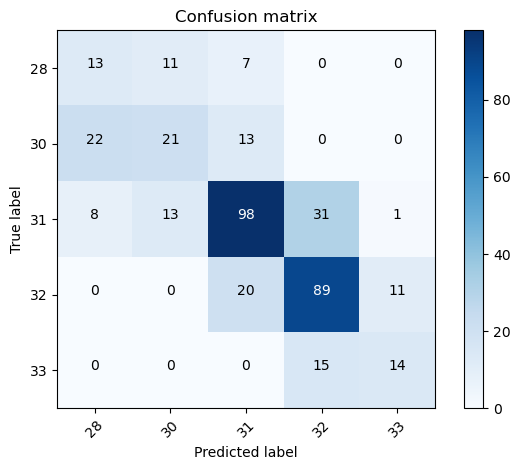

Testing  Accuracy:  0.58


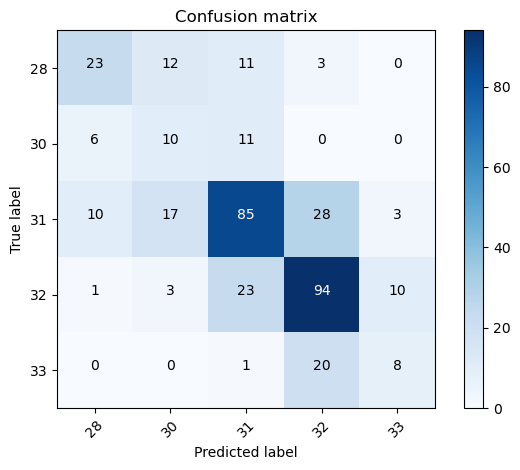

Rotation:  1
Validation  Accuracy:  0.609


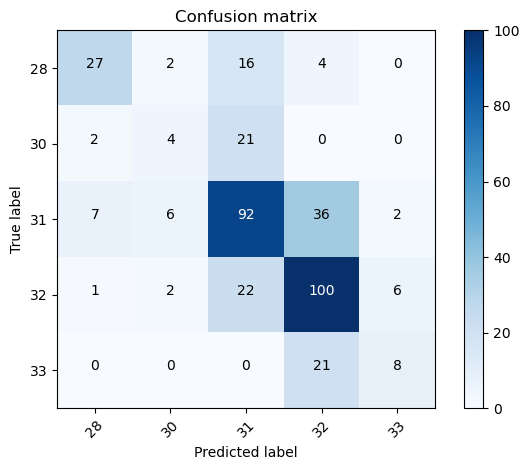

Testing  Accuracy:  0.57


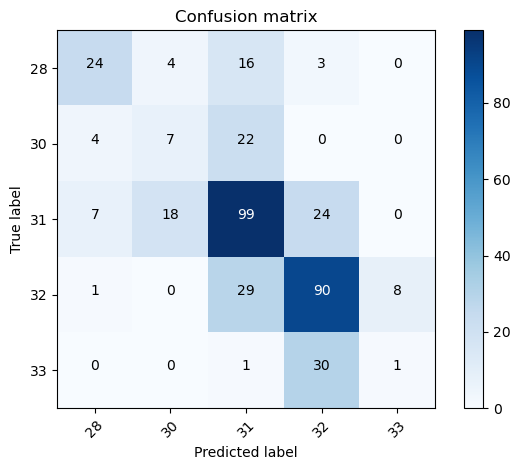

Rotation:  2
Validation  Accuracy:  0.644


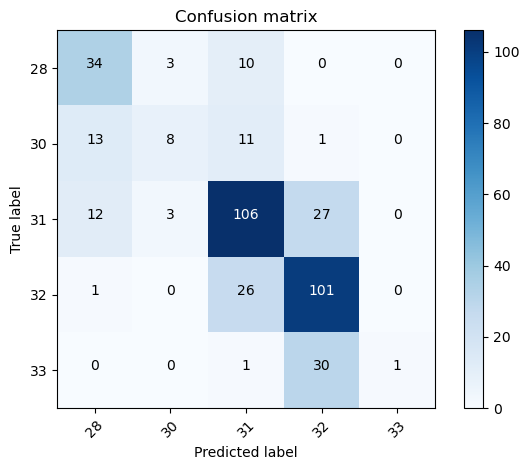

Testing  Accuracy:  0.592


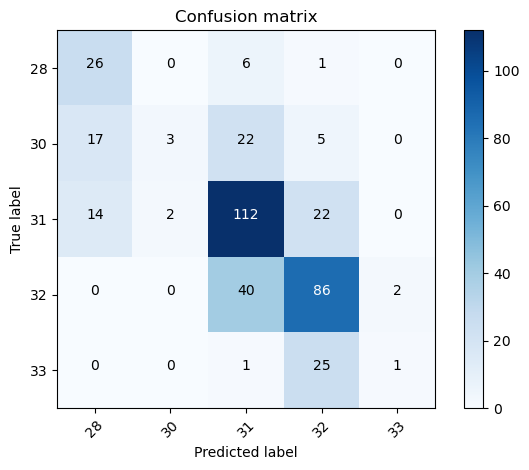

Rotation:  3
Validation  Accuracy:  0.634


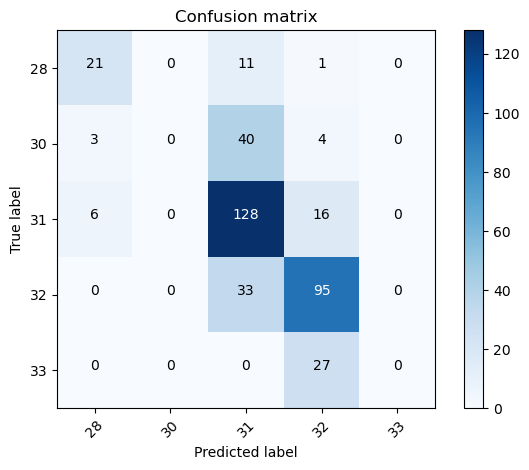

Testing  Accuracy:  0.637


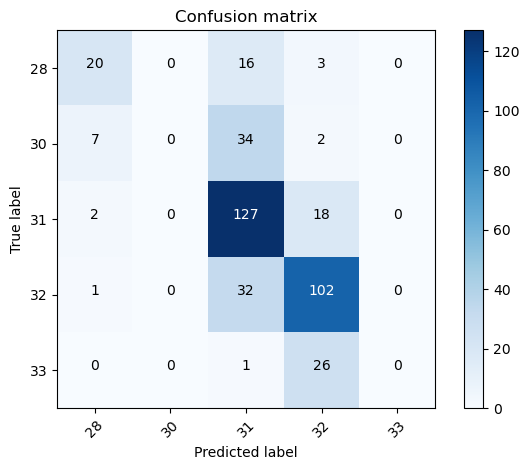

Rotation:  4
Validation  Accuracy:  0.662


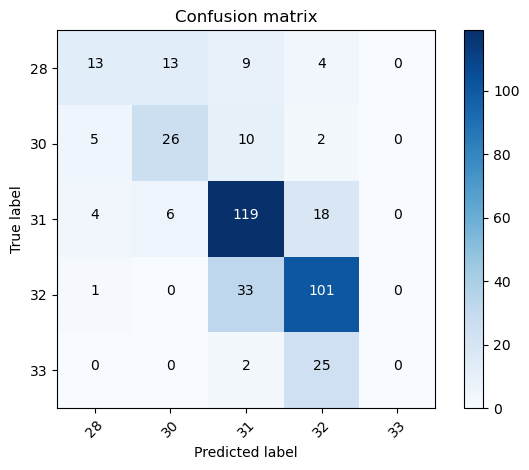

Testing  Accuracy:  0.567


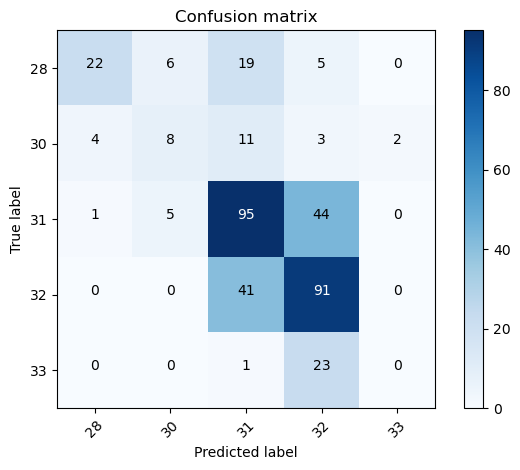

Rotation:  5
Validation  Accuracy:  0.601


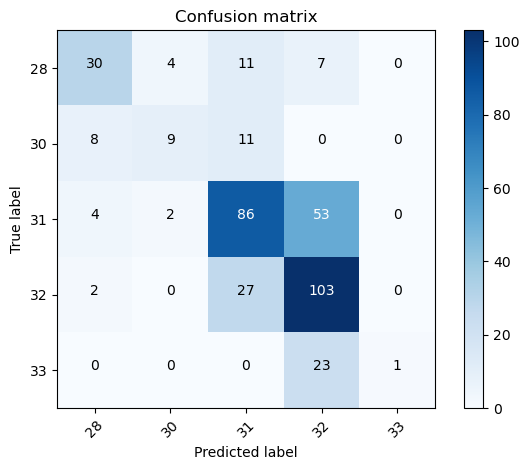

Testing  Accuracy:  0.55


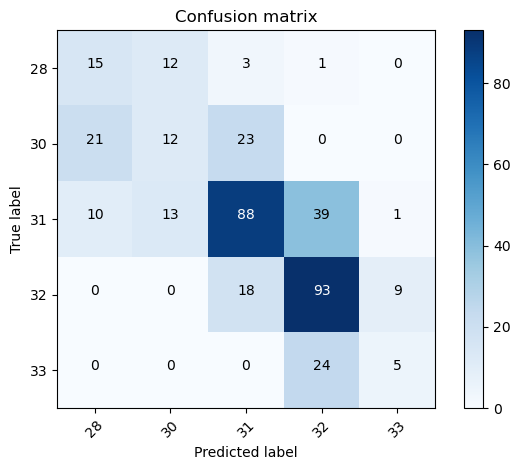

Average validation accuracy: 0.6263806521892548
Average testing accuracy: 0.5827359656492869


'\n28: 204, 11.276948590381426%\n29: 59, 3.26147042564953%\n30: 165, 9.12106135986733%\n31: 661, 36.53952459922609%\n32: 581, 32.117191818684354%\n33: 139, 7.683803206191266%\n    \n28: 47, 8.117443868739207%\n29: 18, 3.1088082901554404%\n30: 69, 11.917098445595855%\n31: 225, 38.860103626943%\n32: 191, 32.98791018998273%\n33: 29, 5.008635578583765%\n'

In [2]:
#post.visualizeConfusion('results', 'folds_rot3_r4_f15_11_11_11_20_18_18_18_25_22_22_22_30_28_28_35_50_80_k5_7_7_7_7_7_7_7_7_7_7_7_7_7_7_6_5_5_p1_1_1_1_3_1_1_1_3_1_1_1_3_1_1_1_1_1_pStrides1_1_1_1_2_1_1_1_2_1_1_1_2_1_1_1_1_1_d72_72_24_drop_0.10_sDrop_0.10_l2_0.00010_results.pkl', ['validation', 'testing'])
post.visualizeConfusion('results', 'tunerV4_*.pkl', ['validation', 'testing'])
#post.visualizeConfusion('results', 'tunerV4-2_*.pkl', ['validation', 'testing'])
#post.visualizeConfusion('results', 'tunerV5_*.pkl', ['validation', 'testing'])
'''
28: 204, 11.276948590381426%
29: 59, 3.26147042564953%
30: 165, 9.12106135986733%
31: 661, 36.53952459922609%
32: 581, 32.117191818684354%
33: 139, 7.683803206191266%
    
28: 47, 8.117443868739207%
29: 18, 3.1088082901554404%
30: 69, 11.917098445595855%
31: 225, 38.860103626943%
32: 191, 32.98791018998273%
33: 29, 5.008635578583765%
'''

tunerV4_trials100_rot0_results.pkl
tunerV4_trials100_rot1_results.pkl
tunerV4_trials100_rot2_results.pkl
tunerV4_trials100_rot3_results.pkl
tunerV4_trials100_rot4_results.pkl
tunerV4_trials100_rot5_results.pkl
Rotation:  0
Validation  Accuracy:  0.607
Testing  Accuracy:  0.58
Rotation:  1
Validation  Accuracy:  0.609
Testing  Accuracy:  0.57
Rotation:  2
Validation  Accuracy:  0.644
Testing  Accuracy:  0.592
Rotation:  3
Validation  Accuracy:  0.634
Testing  Accuracy:  0.637
Rotation:  4
Validation  Accuracy:  0.662
Testing  Accuracy:  0.567
Rotation:  5
Validation  Accuracy:  0.601
Testing  Accuracy:  0.55
2311
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


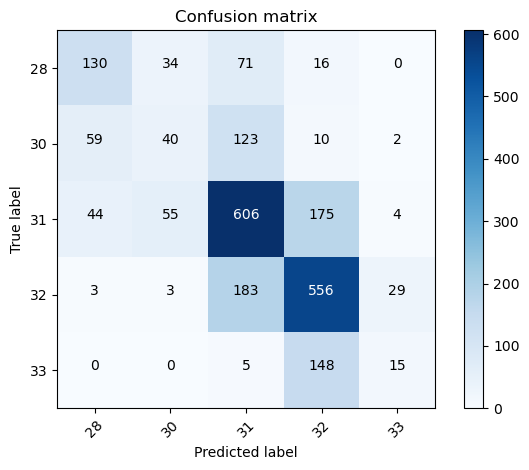

array([[130,  34,  71,  16,   0],
       [ 59,  40, 123,  10,   2],
       [ 44,  55, 606, 175,   4],
       [  3,   3, 183, 556,  29],
       [  0,   0,   5, 148,  15]])

In [3]:
results = post.loadResults('results', 'tunerV4_*.pkl')
types = ['validation', 'testing']
plot = True
accuracy = [0] * len(types)
firstRun = True
for r in results:

    if hasattr(r['args'], 'rot'): #Did this for backward compatibility
        print('Rotation: ', r['args'].rot)

    i = 0
    for t in types:
        key_predict = 'predict_' + t
        key_true = 'true_' + t

        try:
            print(t.capitalize(), ' Accuracy: ', round(r[key_predict+'_eval'][1],3))
            accuracy[i] += r[key_predict+'_eval'][1]
            if t == 'validation' and firstRun:
                valPreds = r[key_predict]
                valTrues = r[key_true]
                firstRun = False
            elif t == 'validation':
                valPreds = np.concatenate((valPreds, r[key_predict]), axis=0)
                valTrues = np.concatenate((valTrues, r[key_true]), axis=0)
        except KeyError as e:
            print('Error, cannot find key ', t)
        i+=1
print(len(valTrues))
print(valTrues)
metrics.generate_confusion_matrix(valTrues, valPreds, ['28', '30', '31', '32', '33'], plot)

In [6]:
model = tf.keras.models.load_model('results/tunerV4_trials500_rot3_model')
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1500, 51)]        0         
_________________________________________________________________
AdvPool (AveragePooling1D)   (None, 750, 51)           0         
_________________________________________________________________
C00 (Conv1D)                 (None, 748, 71)           10934     
_________________________________________________________________
SpatialDrop00 (SpatialDropou (None, 748, 71)           0         
_________________________________________________________________
C01 (Conv1D)                 (None, 748, 46)           3312      
_________________________________________________________________
Max01 (MaxPooling1D)         (None, 250, 46)           0         
_________________________________________________________________
SpatialDrop01 (SpatialDropou (None, 250, 46)           0   

In [199]:
import importlib
importlib.reload(post)
importlib.reload(prep)

<module 'prep' from '/home/reza/Desktop/Symbiotic/HonorsThesis/Model/prep.py'>

Loaded in models:
tunerV4_trials500_rot0_model
tunerV4_trials500_rot1_model
tunerV4_trials500_rot2_model
tunerV4_trials500_rot3_model
tunerV4_trials500_rot4_model
tunerV4_trials500_rot5_model
tunerV4_trials500_rot0_results.pkl
tunerV4_trials500_rot1_results.pkl
tunerV4_trials500_rot2_results.pkl
tunerV4_trials500_rot3_results.pkl
tunerV4_trials500_rot4_results.pkl
tunerV4_trials500_rot5_results.pkl

Mean Difference:  0.03782293949657966
Mean Error:  4.14335525004981
FVAF:  0.6647969667594529

Complete p value:  3.0556504206201577e-63
Complete R^2:  0.6961616872393271
Model 1
p value:  3.3616353831235106e-13
R^2:  0.7560101718220258

Model 2
p value:  2.534682270453223e-10
R^2:  0.6653066814087161

Model 3
p value:  1.5019469351393973e-11
R^2:  0.7025348884409038

Model 4
p value:  1.3809661802983808e-13
R^2:  0.7670877655905001

Model 5
p value:  4.705143629764411e-15
R^2:  0.8048069189847108

Model 6
p value:  4.000330650003799e-12
R^2:  0.7223531669624172



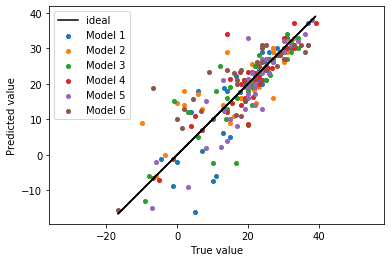

In [7]:
post.analyzeFullPredictions('results', 'tunerV4_trials500_rot?_model', 'tunerV4_trials500_rot?_results.pkl', split='rot', valid=True)

Loaded in models:
tunerV4_trials500_rot0_model
tunerV4_trials500_rot1_model
tunerV4_trials500_rot2_model
tunerV4_trials500_rot3_model
tunerV4_trials500_rot4_model
tunerV4_trials500_rot5_model
tunerV4_trials500_rot0_results.pkl
tunerV4_trials500_rot1_results.pkl
tunerV4_trials500_rot2_results.pkl
tunerV4_trials500_rot3_results.pkl
tunerV4_trials500_rot4_results.pkl
tunerV4_trials500_rot5_results.pkl

Mean Difference:  0.037822939496579694
Mean Error:  4.14335525004981
FVAF:  0.6647969667594528

Complete p value:  3.055650420619637e-63
Complete R^2:  0.6961616872393275
Typical
p value:  3.128147511052622e-57
R^2:  0.7767029081279564

At Risk
p value:  3.2880118482266097e-13
R^2:  0.560309370523455



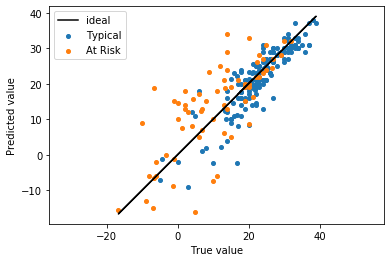

In [8]:
post.analyzeFullPredictions('results', 'tunerV4_trials500_rot?_model', 'tunerV4_trials500_rot?_results.pkl', split='cp', valid=True)

Loaded in models:
tunerV4_trials500_rot0_model
tunerV4_trials500_rot1_model
tunerV4_trials500_rot2_model
tunerV4_trials500_rot3_model
tunerV4_trials500_rot4_model
tunerV4_trials500_rot5_model
tunerV4_trials500_rot0_results.pkl
tunerV4_trials500_rot1_results.pkl
tunerV4_trials500_rot2_results.pkl
tunerV4_trials500_rot3_results.pkl
tunerV4_trials500_rot4_results.pkl
tunerV4_trials500_rot5_results.pkl

Mean Difference:  0.15614000132828584
Mean Error:  4.504582586172544
FVAF:  0.639847961768111

Complete p value:  1.235888052725648e-59
Complete R^2:  0.6741466943558375
Model 1
p value:  3.6762453180232545e-12
R^2:  0.7331131353126183

Model 2
p value:  3.3467258419060925e-12
R^2:  0.724923831587484

Model 3
p value:  5.931819388886936e-11
R^2:  0.6804836295708238

Model 4
p value:  1.624098319909197e-11
R^2:  0.701320881470228

Model 5
p value:  7.099077839152196e-11
R^2:  0.6774833498912617

Model 6
p value:  2.876275258163854e-12
R^2:  0.7270882868750296



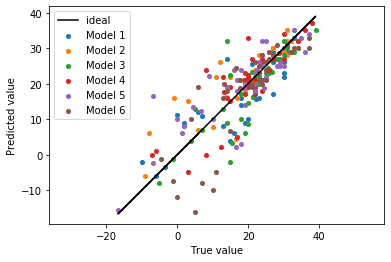

In [9]:
post.analyzeFullPredictions('results', 'tunerV4_trials500_rot?_model', 'tunerV4_trials500_rot?_results.pkl', split='rot', valid=False)

Loaded in models:
tunerV4_trials500_rot0_model
tunerV4_trials500_rot1_model
tunerV4_trials500_rot2_model
tunerV4_trials500_rot3_model
tunerV4_trials500_rot4_model
tunerV4_trials500_rot5_model
tunerV4_trials500_rot0_results.pkl
tunerV4_trials500_rot1_results.pkl
tunerV4_trials500_rot2_results.pkl
tunerV4_trials500_rot3_results.pkl
tunerV4_trials500_rot4_results.pkl
tunerV4_trials500_rot5_results.pkl

Mean Difference:  0.15614000132828615
Mean Error:  4.504582586172545
FVAF:  0.6398479617681108

Complete p value:  1.2358880527251913e-59
Complete R^2:  0.6741466943558386
Typical
p value:  3.936774376577807e-48
R^2:  0.714418595985877

At Risk
p value:  3.47505344369956e-14
R^2:  0.5893814200090676



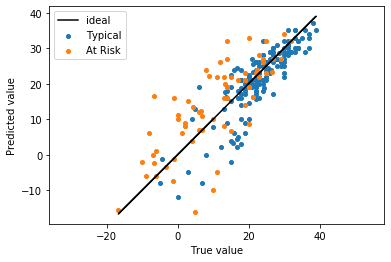

In [10]:
post.analyzeFullPredictions('results', 'tunerV4_trials500_rot?_model', 'tunerV4_trials500_rot?_results.pkl', split='cp')

In [23]:
models = post.loadResults('results', 'tunerV4_trials500_rot?_model', model=True)
args = post.loadResults('results', 'tunerV4_trials500_rot?_results.pkl')
trueScores = [[], []]
predScores = [[], []]
for i in range(0, len(models)):
    t, p = post._getScores(models[i], args[i]['args'], maxSubjNum = 99, valid=True)
    for j in range(0,len(t)):
        trueScores[0].append(t[j])
        predScores[0].append(p[j])

    #Babies with cp
    t, p = post._getScores(models[i], args[i]['args'], minSubjNum = 100, valid=True)
    for j in range(0,len(t)):
        trueScores[1].append(t[j])
        predScores[1].append(p[j])
flatTrues = [t for trues in trueScores for t in trues]
flatPreds = [p for preds in predScores for p in preds]

tunerV4_trials500_rot0_model
tunerV4_trials500_rot1_model
tunerV4_trials500_rot2_model
tunerV4_trials500_rot3_model
tunerV4_trials500_rot4_model
tunerV4_trials500_rot5_model
tunerV4_trials500_rot0_results.pkl
tunerV4_trials500_rot1_results.pkl
tunerV4_trials500_rot2_results.pkl
tunerV4_trials500_rot3_results.pkl
tunerV4_trials500_rot4_results.pkl
tunerV4_trials500_rot5_results.pkl


In [24]:
import pandas as pd
import pingouin as pg

examples = list(range(1, len(flatTrues) + 1)) * 2
groups = [1] * len(flatTrues)
groups += [2] * len(flatTrues)
values = flatTrues + flatPreds
df = pd.DataFrame({
    'example': examples,
    'group': groups,
    'value': values
})
print(df.head())
print(df.tail())

icc = pg.intraclass_corr(data=df, targets='example', raters='group', ratings='value')
icc.set_index('Type')

   example  group      value
0        1      1  21.000000
1        2      1  17.777778
2        3      1  17.777778
3        4      1  25.000000
4        5      1  25.000000
     example  group      value
473      235      2  23.333333
474      236      2  18.888889
475      237      2  -6.666667
476      238      2  15.555556
477      239      2  21.000000


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.834896,11.113612,238,239,3.644607e-64,"[0.79, 0.87]"
ICC2,Single random raters,0.834840,11.067538,238,238,8.954486e-64,"[0.79, 0.87]"
ICC3,Single fixed raters,0.834266,11.067538,238,238,8.954486e-64,"[0.79, 0.87]"
ICC1k,Average raters absolute,0.910020,11.113612,238,239,3.644607e-64,"[0.88, 0.93]"
ICC2k,Average random raters,0.909987,11.067538,238,238,8.954486e-64,"[0.88, 0.93]"
ICC3k,Average fixed raters,0.909646,11.067538,238,238,8.954486e-64,"[0.88, 0.93]"


In [25]:
models = post.loadResults('results', 'tunerV4_trials500_rot?_model', model=True)
args = post.loadResults('results', 'tunerV4_trials500_rot?_results.pkl')
trueScores = [[], []]
predScores = [[], []]
for i in range(0, len(models)):
    t, p = post._getScores(models[i], args[i]['args'], maxSubjNum = 99)
    for j in range(0,len(t)):
        trueScores[0].append(t[j])
        predScores[0].append(p[j])

    #Babies with cp
    t, p = post._getScores(models[i], args[i]['args'], minSubjNum = 100)
    for j in range(0,len(t)):
        trueScores[1].append(t[j])
        predScores[1].append(p[j])
flatTrues = [t for trues in trueScores for t in trues]
flatPreds = [p for preds in predScores for p in preds]

tunerV4_trials500_rot0_model
tunerV4_trials500_rot1_model
tunerV4_trials500_rot2_model
tunerV4_trials500_rot3_model
tunerV4_trials500_rot4_model
tunerV4_trials500_rot5_model
tunerV4_trials500_rot0_results.pkl
tunerV4_trials500_rot1_results.pkl
tunerV4_trials500_rot2_results.pkl
tunerV4_trials500_rot3_results.pkl
tunerV4_trials500_rot4_results.pkl
tunerV4_trials500_rot5_results.pkl


In [27]:
import pandas as pd
import pingouin as pg

examples = list(range(1, len(flatTrues) + 1)) * 2
groups = [1] * len(flatTrues)
groups += [2] * len(flatTrues)
values = flatTrues + flatPreds
df = pd.DataFrame({
    'example': examples,
    'group': groups,
    'value': values
})
print(df.head())
print(df.tail())

icc = pg.intraclass_corr(data=df, targets='example', raters='group', ratings='value')
icc.set_index('Type')

   example  group      value
0        1      1  20.000000
1        2      1  23.000000
2        3      1  22.222222
3        4      1  15.000000
4        5      1  18.000000
     example  group      value
473      235      2 -16.000000
474      236      2  -5.000000
475      237      2  16.000000
476      238      2   6.666667
477      239      2 -10.000000


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.821609,10.211311,238,239,1.611752e-60,"[0.78, 0.86]"
ICC2,Single random raters,0.821552,10.174805,238,238,3.602253e-60,"[0.78, 0.86]"
ICC3,Single fixed raters,0.821026,10.174805,238,238,3.602253e-60,"[0.77, 0.86]"
ICC1k,Average raters absolute,0.902069,10.211311,238,239,1.611752e-60,"[0.87, 0.92]"
ICC2k,Average random raters,0.902035,10.174805,238,238,3.602253e-60,"[0.87, 0.92]"
ICC3k,Average fixed raters,0.901718,10.174805,238,238,3.602253e-60,"[0.87, 0.92]"


In [14]:
examples = list(range(1, len(trueScores[0]) + 1)) * 2
groups = [1] * len(trueScores[0])
groups += [2] * len(trueScores[0])
values = trueScores[0] + predScores[0]
df = pd.DataFrame({
    'example': examples,
    'group': groups,
    'value': values
})
print(df.head())
print(df.tail())

icc = pg.intraclass_corr(data=df, targets='example', raters='group', ratings='value')
icc.set_index('Type')

   example  group      value
0        1      1  20.000000
1        2      1  23.000000
2        3      1  22.222222
3        4      1  15.000000
4        5      1  18.000000
     example  group      value
339      168      2  30.000000
340      169      2  -8.000000
341      170      2  -1.111111
342      171      2 -12.000000
343      172      2  31.000000


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.820653,10.151568,171,172,6.490376e-44,"[0.77, 0.86]"
ICC2,Single random raters,0.821990,11.079342,171,171,2.060503e-46,"[0.75, 0.87]"
ICC3,Single fixed raters,0.834428,11.079342,171,171,2.060503e-46,"[0.78, 0.87]"
ICC1k,Average raters absolute,0.901493,10.151568,171,172,6.490376e-44,"[0.87, 0.93]"
ICC2k,Average random raters,0.902299,11.079342,171,171,2.060503e-46,"[0.86, 0.93]"
ICC3k,Average fixed raters,0.909742,11.079342,171,171,2.060503e-46,"[0.88, 0.93]"


In [16]:
examples = list(range(1, len(trueScores[1]) + 1)) * 2
groups = [1] * len(trueScores[1])
groups += [2] * len(trueScores[1])
values = trueScores[1] + predScores[1]
df = pd.DataFrame({
    'example': examples,
    'group': groups,
    'value': values
})
print(df.head())
print(df.tail())

icc = pg.intraclass_corr(data=df, targets='example', raters='group', ratings='value')
icc.set_index('Type')

   example  group      value
0        1      1   6.000000
1        2      1  -3.333333
2        3      1  14.000000
3        4      1   2.000000
4        5      1   7.000000
     example  group      value
129       63      2 -16.000000
130       64      2  -5.000000
131       65      2  16.000000
132       66      2   6.666667
133       67      2 -10.000000


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.734614,6.536183,66,67,3.696086e-13,"[0.6, 0.83]"
ICC2,Single random raters,0.739220,7.539853,66,66,1.400260e-14,"[0.57, 0.84]"
ICC3,Single fixed raters,0.765804,7.539853,66,66,1.400260e-14,"[0.65, 0.85]"
ICC1k,Average raters absolute,0.847006,6.536183,66,67,3.696086e-13,"[0.75, 0.91]"
ICC2k,Average random raters,0.850059,7.539853,66,66,1.400260e-14,"[0.73, 0.91]"
ICC3k,Average fixed raters,0.867371,7.539853,66,66,1.400260e-14,"[0.78, 0.92]"


Train data:
28: 49, 12.596401028277635%
29: 10, 2.570694087403599%
30: 27, 6.940874035989718%
31: 143, 36.760925449871465%
32: 131, 33.67609254498715%
33: 29, 7.455012853470437%

28: 47, 11.75%
29: 12, 3.0%
30: 33, 8.25%
31: 148, 37.0%
32: 128, 32.0%
33: 32, 8.0%

28: 52, 13.032581453634084%
29: 18, 4.511278195488721%
30: 28, 7.017543859649122%
31: 145, 36.340852130325814%
32: 132, 33.08270676691729%
33: 24, 6.015037593984962%

28: 31, 7.75%
29: 13, 3.25%
30: 56, 14.000000000000002%
31: 151, 37.75%
32: 120, 30.0%
33: 29, 7.249999999999999%

Validation data:
28: 33, 8.25%
29: 15, 3.75%
30: 47, 11.75%
31: 150, 37.5%
32: 128, 32.0%
33: 27, 6.75%

Test data:
28: 39, 9.75%
29: 9, 2.25%
30: 43, 10.75%
31: 147, 36.75%
32: 135, 33.75%
33: 27, 6.75%



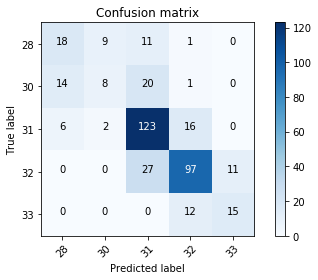

In [179]:
parser = tunerExperiment.create_parser()
args = parser.parse_args()
args.foldsPath = "folds"
args.rot = 3
ins, outs, validIns, validOuts, testIns, testOuts = tunerExperiment.load_data(args)
cm1 = metrics.generate_confusion_matrix(testOuts, pred, ['28', '30', '31', '32', '33'])

In [180]:
import numpy as np
import math

sumDiag = 0
sumDiagpm1 = 0
trials = 100
for trial in range(0,trials):
    randomOuts = np.array(testOuts, copy=True)
    np.random.shuffle(randomOuts)
    cm2 = metrics.generate_confusion_matrix(randomOuts, pred, ['28', '30', '31', '32', '33'], plot=False)

    total = 0
    diag = 0
    diagpm1 = 0
    for i in range(0,len(cm2)):
        for j in range(0, len(cm2[i])):
            total+= cm2[i][j]
            if j >= i - 1 and  j <= i+1:
                diagpm1 += cm2[i][j]
        diag += cm2[i][i]
    sumDiag += diag / total
    sumDiagpm1 += diagpm1 / total

meanDiag = sumDiag / trials
meanDiagpm1 = sumDiagpm1 / trials

sdDiag = 0
sdDiagpm1 = 0

for trail in range(0,trials):
    total = 0
    diag = 0
    diagpm1 = 0
    for i in range(0,len(cm2)):
        for j in range(0, len(cm2[i])):
            total+= cm2[i][j]
            if j >= i - 1 and  j <= i+1:
                diagpm1 += cm2[i][j]
        diag += cm2[i][i]
        
    sdDiag += (diag/total - meanDiag) ** 2
    sdDiagpm1 += (diagpm1/total - meanDiagpm1) ** 2
sdDiag = math.sqrt(sdDiag / trials)
sdDiagpm1 = math.sqrt(sdDiagpm1 / trials)

print(meanDiag)
print(sdDiag)
print()
print(meanDiagpm1)
print(sdDiagpm1)

#print(total)
#print()
#print(diag)
#print(diag/total)
#print()
#print(diagpm1)
#print(diagpm1/total)

0.3062659846547315
0.0031969309462915323

0.7186189258312021
0.0025063938618926614


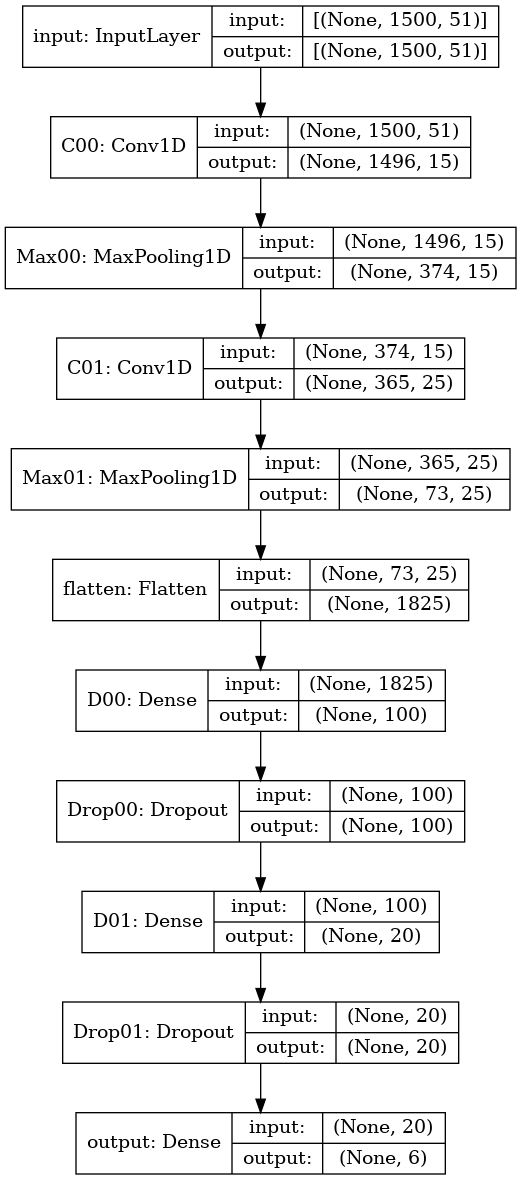

In [16]:
model = tf.keras.models.load_model('results/pres_r1_f15_25_k5_10_p3_3_pStrides4_5_d100_20_drop_0.10_sDrop_0.00_l2_0.00000_rot1_model')
tf.keras.utils.plot_model(model, show_shapes=True)